In [121]:
import pandas as pd
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN


from river import cluster
from river import stream
from river import anomaly
from river.drift import ADWIN

from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

import pickle

In [93]:
df = pd.read_csv("temp.csv")

In [94]:
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


## ADTK

https://www.influxdata.com/blog/birch-for-anomaly-detection-with-influxdb/  
https://arundo-adtk.readthedocs-hosted.com/en/stable/

In [95]:
import adtk

In [96]:
from adtk.data import validate_series
from adtk.visualization import plot

In [97]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
s_train = validate_series(df["value"])
s_train

timestamp
2013-07-04 00:00:00    69.880835
2013-07-04 01:00:00    71.220227
2013-07-04 02:00:00    70.877805
2013-07-04 03:00:00    68.959400
2013-07-04 04:00:00    69.283551
                         ...    
2014-05-28 11:00:00    72.370206
2014-05-28 12:00:00    72.172956
2014-05-28 13:00:00    72.046565
2014-05-28 14:00:00    71.825226
2014-05-28 15:00:00    72.584089
Name: value, Length: 7267, dtype: float64

[<AxesSubplot:>]

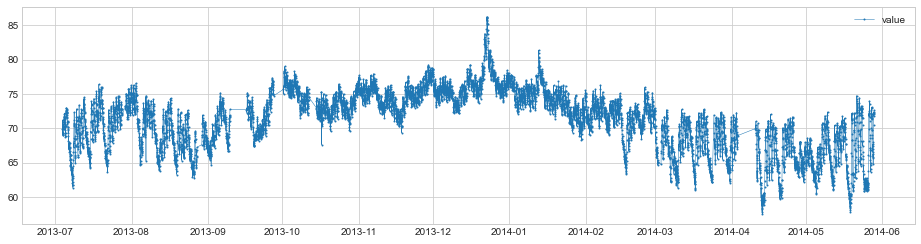

In [98]:
plot(s_train)

In [99]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)

## ADTK with KMeans

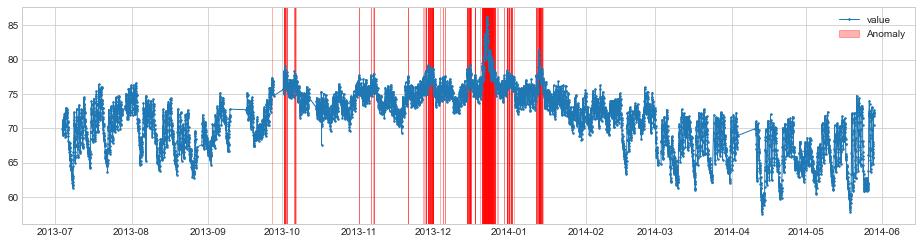

In [100]:
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=7))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

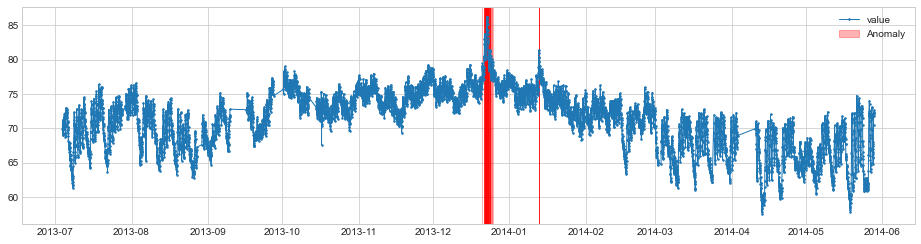

In [101]:
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=8))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

## ADTK With Birch
(balanced iterative reducing and clustering using hierarchies)

#### With n_clusters=2

[<AxesSubplot:>]

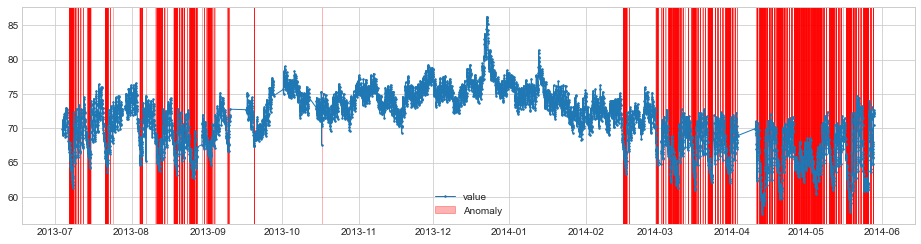

In [102]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(Birch(n_clusters=2))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

#### With n_clusters = 3

[<AxesSubplot:>]

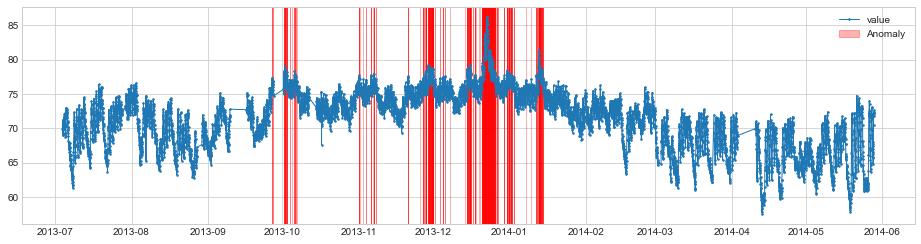

In [111]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(Birch(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

#### With n_clusters = 6

[<AxesSubplot:>]

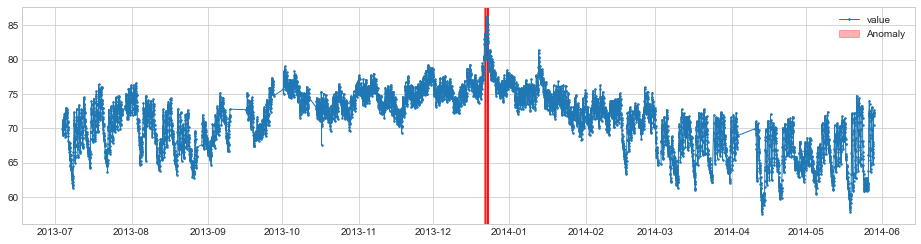

In [112]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(Birch(n_clusters=6))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

## ADTK with dbscan

In [105]:
# df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
# df = validate_series(df)
# min_cluster_detector = MinClusterDetector(DBSCAN())
# anomalies = min_cluster_detector.fit_predict(df)
# plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')


# UNDER CONSTRUCTION

## ADTK with sk-learn's OutlierDetector

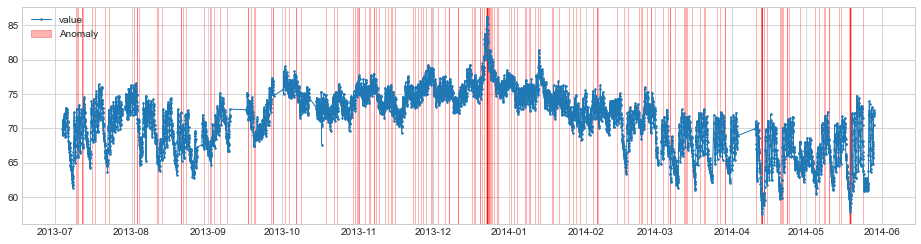

In [106]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.025))
anomalies = outlier_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');


## ADTK with sk-learn's Isolation Forest

With n_estimators = 50

[<AxesSubplot:>]

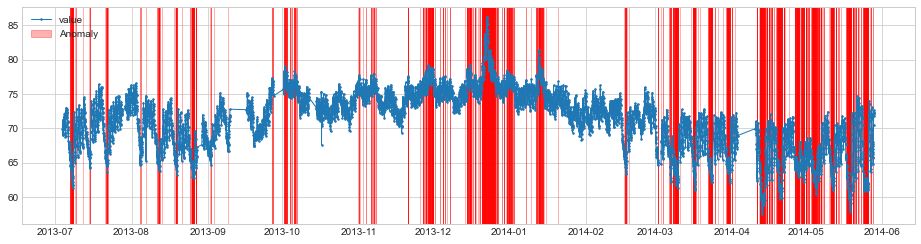

In [107]:
from adtk.detector import OutlierDetector
from sklearn.ensemble import IsolationForest
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(IsolationForest(n_estimators=50))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

With n_estimators = 30

[<AxesSubplot:>]

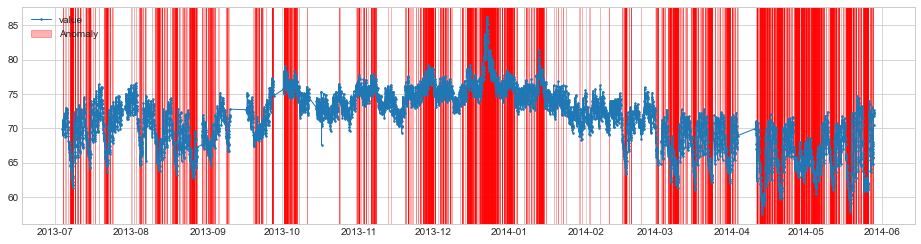

In [109]:
from adtk.detector import OutlierDetector
from sklearn.ensemble import IsolationForest
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(IsolationForest(n_estimators=30))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

#### Look at creating, saving, then loading sk-learn models with ADTK

Create the model

[<AxesSubplot:>]

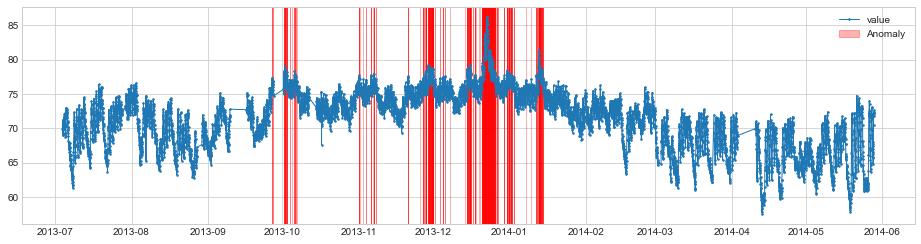

In [133]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
df = validate_series(df)
min_cluster_detector = MinClusterDetector(Birch(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

Save the model

In [139]:
# save the model to disk
filename = 'saved_model.sav'
pickle.dump(min_cluster_detector.model, open(filename, 'wb'))
 
min_cluster_detector.model = None

Test that the model fails

In [140]:
try:
    anomalies = min_cluster_detector.detect(df)
except:
    print("successfully failed")

successfully failed


Load the model

[<AxesSubplot:>]

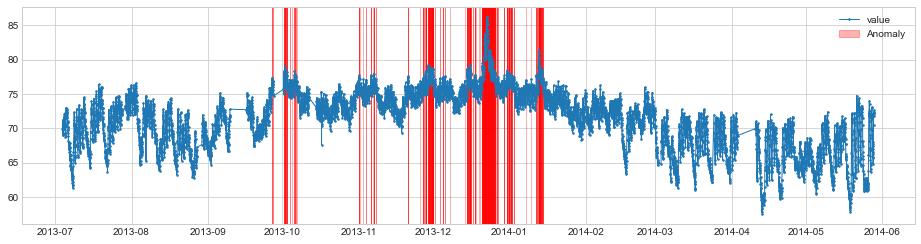

In [141]:
# load the model from disk
model = pickle.load(open(filename, 'rb'))
min_cluster_detector.model = model

anomalies = min_cluster_detector.detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

## River

https://github.com/online-ml/river/

In [18]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)

#### River with DBSTREAM

In [19]:
from river import cluster
from river import stream



dbstream = cluster.DBSTREAM(clustering_threshold = 1.5,
                             fading_factor = 0.05,
                             cleanup_interval = 4,
                             intersection_factor = 0.5,
                             minimum_weight = 1)

X = df.values

for x, _ in stream.iter_array(X):
    dbstream = dbstream.learn_one(x)

print("predict on 72")
print(dbstream.predict_one({0: 72}))

print("predict on 55")
print(dbstream.predict_one({0: 55}))

print("predict on 86")
print(dbstream.predict_one({0: 55}))


print("number of clusters")
print(dbstream.n_clusters)



predict on 72
4
predict on 55
12
predict on 86
13
number of clusters
14


#### River with Anomaly

In [20]:

df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
X = df.values

hst = anomaly.HalfSpaceTrees(
     n_trees=7,
     height=6,
     window_size=3,
     seed=42)

for x in X[:3]:
     hst = hst.learn_one({'x': x})  # Warming up
        
mean_anomaly_score = 0

for x in X:
    features = {'x': x}
    hst = hst.learn_one(features)
    score = hst.score_one(features)
    mean_anomaly_score += score
print("average anomaly score", mean_anomaly_score/len(X))



average anomaly score 0.0


Half-Space Trees (HST).

Half-space trees are an online variant of isolation forests.  
They work well when anomalies are spread out.  
However, they do not work well if anomalies are packed together in windows.

In [21]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
X = df.values

drifts = []

adwin = ADWIN()
for i, val in enumerate(X):
    in_drift, in_warning = adwin.update(val)
    if in_drift:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

Change detected at index 95, input value: [64.24663357]
Change detected at index 191, input value: [70.01828427]
Change detected at index 351, input value: [73.99496326]
Change detected at index 383, input value: [74.0239745]
Change detected at index 447, input value: [70.36650487]
Change detected at index 479, input value: [70.94274876]
Change detected at index 543, input value: [72.58748947]
Change detected at index 575, input value: [72.19240313]
Change detected at index 607, input value: [72.52081721]
Change detected at index 703, input value: [71.24355108]
Change detected at index 735, input value: [68.16946111]
Change detected at index 767, input value: [69.08522976]
Change detected at index 831, input value: [71.98821679]
Change detected at index 895, input value: [65.59894884]
Change detected at index 927, input value: [67.87219243]
Change detected at index 959, input value: [66.99569939]
Change detected at index 991, input value: [72.32617126]
Change detected at index 1023, in

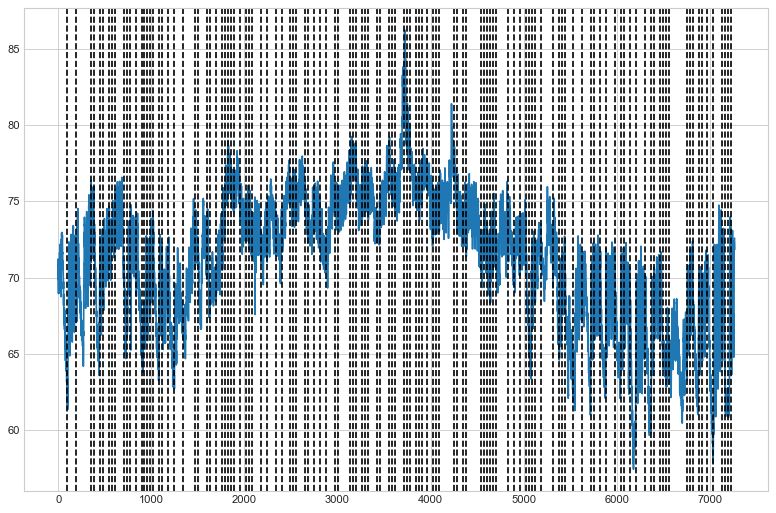

In [22]:
figure(figsize=(12, 8), dpi=80)

plt.plot(X)
for xc in drifts:
    plt.axvline(x=xc, color='k', linestyle='--')

## PyOD

In [23]:
df = pd.read_csv('temp.csv', index_col="timestamp", parse_dates=True, squeeze=False)
X = df.values

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores


In [24]:
sum(y_train_pred)/len(X)

0.10004128250997661

In [25]:
anomaly_indexs = list(np.where(y_train_pred == 1))[0]

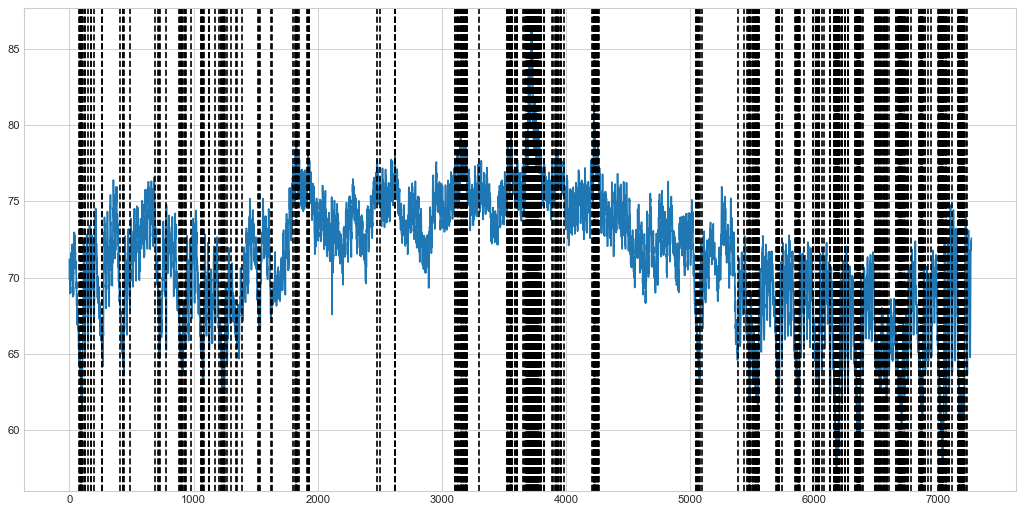

In [26]:
figure(figsize=(16, 8), dpi=80)

plt.plot(X)
for xc in anomaly_indexs:
    plt.axvline(x=xc, color='k', linestyle='--')

## Microsoft Azure Anomaly Detection

In [1]:
import os
from azure.ai.anomalydetector import AnomalyDetectorClient
from azure.ai.anomalydetector.models import DetectRequest, TimeSeriesPoint, TimeGranularity, \
    AnomalyDetectorError
from azure.core.credentials import AzureKeyCredential
import pandas as pd

In [2]:
SUBSCRIPTION_KEY = os.environ["ANOMALY_DETECTOR_KEY"]
ANOMALY_DETECTOR_ENDPOINT = os.environ["ANOMALY_DETECTOR_ENDPOINT"]
TIME_SERIES_DATA_PATH = os.path.join("./", "temp.csv")

In [69]:
client = AnomalyDetectorClient(AzureKeyCredential(SUBSCRIPTION_KEY), ANOMALY_DETECTOR_ENDPOINT)
# client = AnomalyDetectorClient(ANOMALY_DETECTOR_ENDPOINT, CognitiveServicesCredentials(SUBSCRIPTION_KEY))

# anomaly_detector_client = AnomalyDetectorClient(ANOMALY_DETECTOR_ENDPOINT, ANOMALY_DETECTOR_KEY)
# instead it should be
# anomaly_detector_client = AnomalyDetectorClient(ANOMALY_DETECTOR_ENDPOINT, CognitiveServicesCredentials(ANOMALY_DETECTOR_KEY))

In [70]:
import datetime
from datetime import timezone, datetime

# 3rd party modules
import pandas as pd
import pytz

df = pd.read_csv('temp.csv', squeeze=False, encoding='utf-8', date_parser=[0])
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')






print(df.head())
print(df.dtypes)

df['timestamp'] = df['timestamp'].dt.tz_localize(timezone.utc)



# Convert the time from to another timezone
# The point in time does not change, only the associated timezone
my_timezone = pytz.timezone('Canada/Pacific')
df['timestamp'] = df['timestamp'].dt.tz_convert(my_timezone)


print(df.head())
print(df.dtypes)

            timestamp      value
0 2013-07-04 00:00:00  69.880835
1 2013-07-04 01:00:00  71.220227
2 2013-07-04 02:00:00  70.877805
3 2013-07-04 03:00:00  68.959400
4 2013-07-04 04:00:00  69.283551
timestamp    datetime64[ns]
value               float64
dtype: object
                  timestamp      value
0 2013-07-03 17:00:00-07:00  69.880835
1 2013-07-03 18:00:00-07:00  71.220227
2 2013-07-03 19:00:00-07:00  70.877805
3 2013-07-03 20:00:00-07:00  68.959400
4 2013-07-03 21:00:00-07:00  69.283551
timestamp    datetime64[ns, Canada/Pacific]
value                               float64
dtype: object


In [73]:
series = []


from dateutil.tz import tzutc
from dateutil.parser import parse

def parse_date_string(x):
    s = x.split(" ")
    return s[0]+"T"+s[1]+"Z"

data_file = pd.read_csv("temp.csv", encoding='utf-8', date_parser=[0])
data_file["timestamp"] = data_file["timestamp"].apply(parse_date_string)
print(data_file.head())

data_file.timestamp = pd.to_datetime(data_file['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

data_file["timestamp"] = data_file["timestamp"].dt.strftime('%Y-%m-%dT%H:%M:%SZ')

# data_file['timestamp'] = data_file['timestamp'].dt.tz_localize(timezone.utc)



# # Convert the time from to another timezone
# # The point in time does not change, only the associated timezone
# my_timezone = pytz.timezone('Canada/Pacific')
# data_file['timestamp'] = data_file['timestamp'].dt.tz_convert(my_timezone)

print(data_file.head())

for index, row in data_file.iterrows():
    series.append(TimeSeriesPoint(timestamp=row[0], value=row[1]))


              timestamp      value
0  2013-07-04T00:00:00Z  69.880835
1  2013-07-04T01:00:00Z  71.220227
2  2013-07-04T02:00:00Z  70.877805
3  2013-07-04T03:00:00Z  68.959400
4  2013-07-04T04:00:00Z  69.283551
              timestamp      value
0  2013-07-04T00:00:00Z  69.880835
1  2013-07-04T01:00:00Z  71.220227
2  2013-07-04T02:00:00Z  70.877805
3  2013-07-04T03:00:00Z  68.959400
4  2013-07-04T04:00:00Z  69.283551


In [74]:
print(row[0], row[1])

2014-05-28T15:00:00Z 72.58408858


In [75]:
request = DetectRequest(series=series, granularity=TimeGranularity.hourly)

In [76]:
print(data_file.dtypes)

timestamp     object
value        float64
dtype: object


In [77]:
print('Detecting anomalies in the entire time series.')

try:
    response = client.detect_entire_series(request)
except Exception as e:
    print(e)

anomaly_indexes = []
if any(response.is_anomaly):
    print('An anomaly was detected at index:')
    for i, value in enumerate(response.is_anomaly):
        if value:
            print(i)
            anomaly_indexes.append(i)
else:
    print('No anomalies were detected in the time series.')

Detecting anomalies in the entire time series.
An anomaly was detected at index:
780
2115
3558
3559
3561
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
4223
4224
4225
4226
4227
4228
4230
4231
4233
4234
4236
4237
7097
7098
7099
7120
7122


              timestamp      value
0  2013-07-04T00:00:00Z  69.880835
1  2013-07-04T01:00:00Z  71.220227
2  2013-07-04T02:00:00Z  70.877805
3  2013-07-04T03:00:00Z  68.959400
4  2013-07-04T04:00:00Z  69.283551
Index(['timestamp', 'value'], dtype='object')


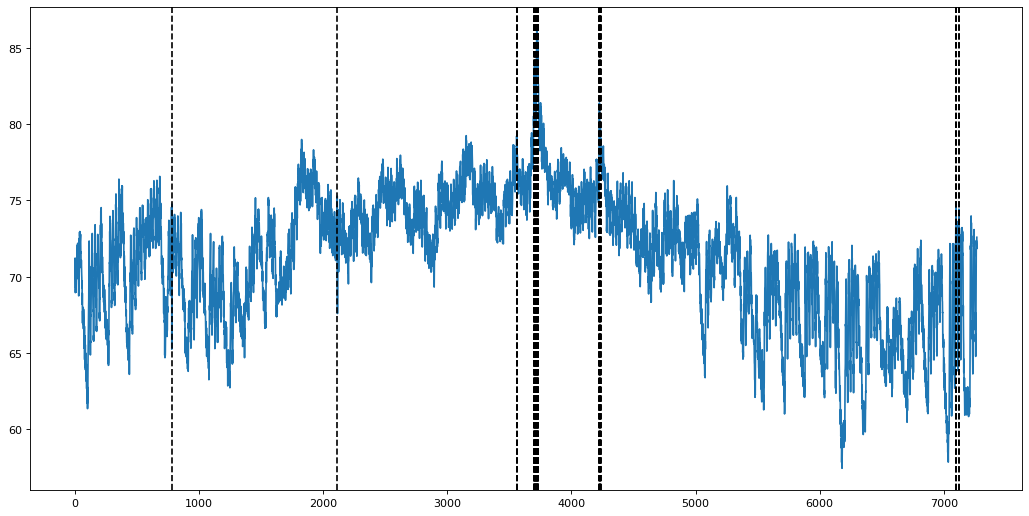

In [80]:
print(data_file.head())
figure(figsize=(16, 8), dpi=80)
print(data_file.columns)
plt.plot(data_file["value"])
for xc in anomaly_indexes:
    plt.axvline(x=xc, color='k', linestyle='--')

#### With microsoft's example

In [87]:
series = []
data_file = pd.read_csv("request-data.csv", header=None, encoding='utf-8', date_parser=[0])
print(data_file.head())
for index, row in data_file.iterrows():
    series.append(TimeSeriesPoint(timestamp=row[0], value=row[1]))

                      0         1
0  2018-03-01T00:00:00Z  32858923
1  2018-03-02T00:00:00Z  29615278
2  2018-03-03T00:00:00Z  22839355
3  2018-03-04T00:00:00Z  25948736
4  2018-03-05T00:00:00Z  34139159


In [88]:
print(data_file.dtypes)

0    object
1     int64
dtype: object


In [89]:
request = DetectRequest(series=series, granularity=TimeGranularity.daily)

In [90]:
print('Detecting anomalies in the entire time series.')

try:
    response = client.detect_entire_series(request)
except Exception as e:
    print(e)

anomaly_indexes = []
if any(response.is_anomaly):
    print('An anomaly was detected at index:')
    for i, value in enumerate(response.is_anomaly):
        if value:
            print(i)
            anomaly_indexes.append(i)
else:
    print('No anomalies were detected in the time series.')

Detecting anomalies in the entire time series.
An anomaly was detected at index:
3
18
21
22
23
24
25
28
29
30
31
32
35
44


Int64Index([0, 1], dtype='int64')


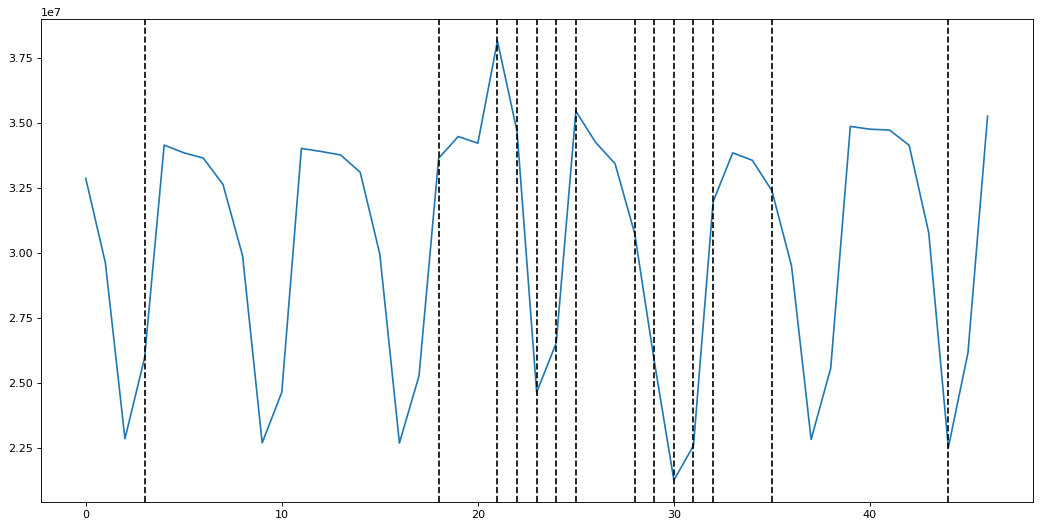

In [91]:
figure(figsize=(16, 8), dpi=80)
print(data_file.columns)
plt.plot(data_file[1])
for xc in anomaly_indexes:
    plt.axvline(x=xc, color='k', linestyle='--')